<a href="https://colab.research.google.com/github/MananPoojara/CV-Labwork/blob/main/pr4CV_Canny_Edge_Detector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from scipy.ndimage.filters import convolve
import os

# Convert RGB to Grayscale
def rgb2gray(img):
    return (np.dot(img[...,:3], [0.2989, 0.5870, 0.1140])).astype('float32')


<ipython-input-10-8767317b730a>:4: DeprecationWarning: Please import `convolve` from the `scipy.ndimage` namespace; the `scipy.ndimage.filters` namespace is deprecated and will be removed in SciPy 2.0.0.
  from scipy.ndimage.filters import convolve


In [ ]:
# Apply Sobel Operator (Gradient Calculation)
def convolveWithGaussianDerivative(img):
    sobel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]], np.float32)
    sobel_y = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]], np.float32)
    Ix = convolve(img, sobel_x)
    Iy = convolve(img, sobel_y)
    theta_angle = np.arctan2(Iy, Ix)
    return Ix, Iy, theta_angle

In [ ]:
# Non-Maximum Suppression
def Non_maximal_Suppression(Gradient, theta_angle):
    output = np.zeros(Gradient.shape, dtype=np.float32)
    angle = np.degrees(theta_angle) % 180
    for i in range(1, Gradient.shape[0]-1):
        for j in range(1, Gradient.shape[1]-1):
            q, r = 255, 255
            if (0 <= angle[i,j] < 22.5) or (157.5 <= angle[i,j] <= 180):
                q, r = Gradient[i, j+1], Gradient[i, j-1]
            elif (22.5 <= angle[i,j] < 67.5):
                q, r = Gradient[i+1, j-1], Gradient[i-1, j+1]
            elif (67.5 <= angle[i,j] < 112.5):
                q, r = Gradient[i+1, j], Gradient[i-1, j]
            elif (112.5 <= angle[i,j] < 157.5):
                q, r = Gradient[i-1, j-1], Gradient[i+1, j+1]
            if Gradient[i,j] >= q and Gradient[i,j] >= r:
                output[i,j] = Gradient[i,j]
            else:
                output[i,j] = 0
    return output

In [ ]:
# Thresholding
def threshold(img, low_Th, high_Th):
    output = np.zeros(img.shape, dtype='float32')
    strong = np.where(img >= high_Th)
    weak = np.where((img >= low_Th) & (img < high_Th))
    output[strong] = 1.0
    output[weak] = 0.5
    return output

In [ ]:
# Check 8-neighborhood for strong edges
def check_8_neighbourhood(img, row, col):
    dirs = [[0,1],[0,-1],[-1,0],[1,0],[-1,-1],[1,-1],[-1,1],[1,1]]
    for d in dirs:
        if img[row + d[0], col + d[1]] == 1.0:
            return True
    return False

In [ ]:
# Perform Hysteresis
def perfom_hysteresis(img):
    _img = np.copy(img)
    for i in range(1, img.shape[0]-1):
        for j in range(1, img.shape[1]-1):
            if _img[i, j] == 0.5 and check_8_neighbourhood(img, i, j):
                _img[i, j] = 1.0
    _img[_img == 0.5] = 0.0
    return _img

In [ ]:
# Process and Display Side-by-Side
def GenerateResults(img_path, ax1, ax2, title):
    if not os.path.exists(img_path):
        print(f"Error: File {img_path} not found!")
        return

    img = mpimg.imread(img_path).astype('float32') / 255.0
    img_gray = rgb2gray(img)

    Ix, Iy, theta_angle = convolveWithGaussianDerivative(img_gray)
    Gradient = np.hypot(Ix, Iy)
    Gradient /= np.max(Gradient)

    thinned_edge_image = Non_maximal_Suppression(Gradient, theta_angle)
    thresholded_img = threshold(thinned_edge_image, 0.1, 0.25)
    hystersis_img = perfom_hysteresis(thresholded_img)

    # Display Side-by-Side
    ax1.imshow(img_gray, cmap='gray')
    ax1.set_title(f"{title} - Grayscale")
    ax1.axis("off")

    ax2.imshow(hystersis_img, cmap='gray')
    ax2.set_title(f"{title} - Edge Detected")
    ax2.axis("off")

Upload 4 images...


Saving 20250222_151735.jpg to 20250222_151735.jpg
Saving 20250223_111717.jpg to 20250223_111717.jpg
Saving 20250223_111721.jpg to 20250223_111721.jpg
Saving 20250223_111943.jpg to 20250223_111943.jpg
Saving 20250223_113756.jpg to 20250223_113756.jpg


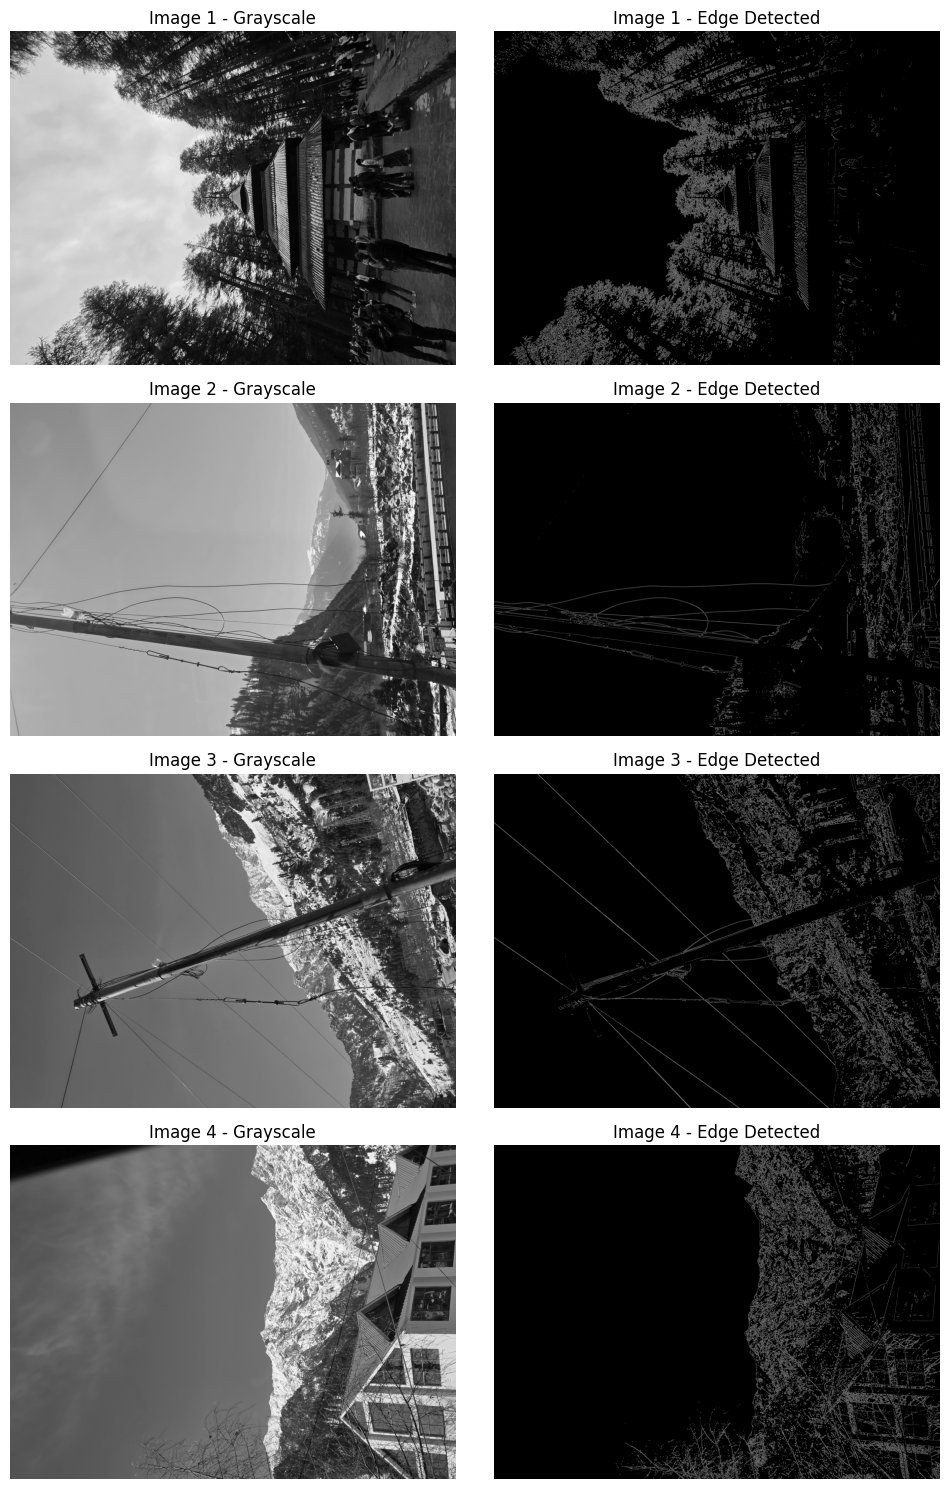

In [ ]:
from google.colab import files

print("Upload 4 images...")
uploaded = files.upload()  # Manually upload 3 images

img_paths = list(uploaded.keys())[:4]  # Get file names

# ---- DISPLAY RESULTS FOR 3 IMAGES ----
fig, axes = plt.subplots(len(img_paths), 2, figsize=(10, 15))

for i, img_path in enumerate(img_paths):
    GenerateResults(img_path, axes[i, 0], axes[i, 1], f"Image {i+1}")

plt.tight_layout()
plt.show()
